In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('cancer_classification.csv')

<h1> Explaratory Data Analysis </h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

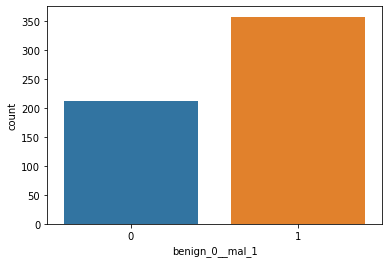

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

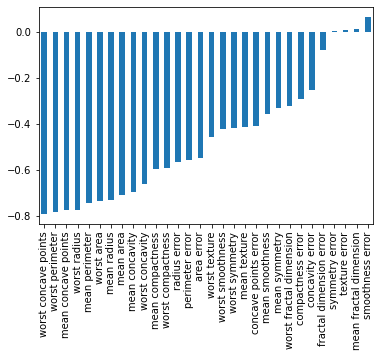

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

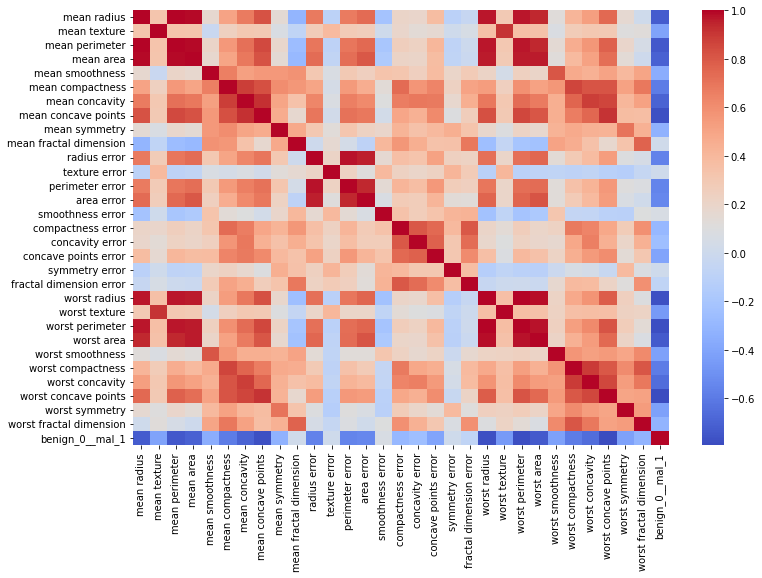

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="coolwarm")

<h1> Model Buiding </h1>

In [17]:
X = df.drop("benign_0__mal_1",axis=1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.fit_transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,Dropout

In [30]:
X_train.shape

(426, 30)

In [32]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [33]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.7095 - val_loss: 0.6831
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6753 - val_loss: 0.6573
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.6467 - val_loss: 0.6281
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6182 - val_loss: 0.5886
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.5842 - val_loss: 0.5414
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.5296 - val_loss: 0.4865
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4792 - val_loss: 0.4250
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4167 - val_loss: 0.3669
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.3712 - val_loss: 0.3250
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.3032 - val_loss: 0.2828
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.2906 - val_loss: 0.2729
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - val_loss: 0.2172
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - val_loss: 0.2386
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - val_loss: 0.2079
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - val_loss: 0.2503
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0713 - val_loss: 0.2180
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - val_loss: 0.2187
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0574 - val_loss: 0.2328
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0612 - val_loss: 0.2503
Epoch 77/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - val_loss: 0.2244
Epoch 78/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0718 - val_loss: 0.2445
Epoch 79/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0588 - val_loss: 0.2132
Epoch 80/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0412

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - val_loss: 0.3318
Epoch 138/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - val_loss: 0.3542
Epoch 139/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - val_loss: 0.3060
Epoch 140/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - val_loss: 0.3520
Epoch 141/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - val_loss: 0.3384
Epoch 142/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - val_loss: 0.3334
Epoch 143/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - val_loss: 0.3368
Epoch 144/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - val_loss: 0.3546
Epoch 145/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0501 - val_loss: 0.3350
Epoch 146/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - val_loss: 0.3684
Epoch 147/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - val_loss: 0.3219
Epoch 148/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - val_loss: 0.3473
Epoch 205/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - val_loss: 0.5239
Epoch 206/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0383 - val_loss: 0.3920
Epoch 207/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - val_loss: 0.4457
Epoch 208/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0344 - val_loss: 0.3765
Epoch 209/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - val_loss: 0.4620
Epoch 210/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - val_loss: 0.3882
Epoch 211/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - val_loss: 0.4135
Epoch 212/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0367 - val_loss: 0.4729
Epoch 213/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - val_loss: 0.3689
Epoch 214/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - val_loss: 0.4720
Epoch 215/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - val_loss: 0.5609
Epoch 272/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.5436
Epoch 273/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.4783
Epoch 274/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0465 - val_loss: 0.5124
Epoch 275/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0299 - val_loss: 0.4964
Epoch 276/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0290 - val_loss: 0.4670
Epoch 277/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0239 - val_loss: 0.6173
Epoch 278/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0159 - val_loss: 0.4876
Epoch 279/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0252 - val_loss: 0.5725
Epoch 280/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 - val_loss: 0.5127
Epoch 281/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0299 - val_loss: 0.4875
Epoch 282/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - val_loss: 0.6492
Epoch 339/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0274 - val_loss: 0.6578
Epoch 340/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - val_loss: 0.6626
Epoch 341/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - val_loss: 0.5815
Epoch 342/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162 - val_loss: 0.6649
Epoch 343/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311 - val_loss: 0.6604
Epoch 344/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - val_loss: 0.5818
Epoch 345/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - val_loss: 0.6547
Epoch 346/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - val_loss: 0.6196
Epoch 347/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.6080
Epoch 348/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - val_loss: 0.6779
Epoch 349/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - val_loss: 0.5796
Epoch 406/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - val_loss: 0.7528
Epoch 407/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - val_loss: 0.6658
Epoch 408/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0278 - val_loss: 0.8612
Epoch 409/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0188 - val_loss: 0.6484
Epoch 410/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0191 - val_loss: 0.6854
Epoch 411/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.7110
Epoch 412/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - val_loss: 0.7323
Epoch 413/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0260 - val_loss: 0.6642
Epoch 414/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - val_loss: 0.7554
Epoch 415/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - val_loss: 0.7523
Epoch 416/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - val_loss: 0.8787
Epoch 473/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - val_loss: 0.6322
Epoch 474/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 - val_loss: 0.8712
Epoch 475/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - val_loss: 0.6994
Epoch 476/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - val_loss: 0.8262
Epoch 477/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - val_loss: 0.7771
Epoch 478/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - val_loss: 0.7974
Epoch 479/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159 - val_loss: 0.8157
Epoch 480/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.8245
Epoch 481/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.8057
Epoch 482/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - val_loss: 0.8649
Epoch 483/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - val_loss: 0.8250
Epoch 540/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.9642
Epoch 541/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - val_loss: 0.8263
Epoch 542/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0126 - val_loss: 1.0000
Epoch 543/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - val_loss: 0.8667
Epoch 544/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.9968
Epoch 545/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - val_loss: 0.6835
Epoch 546/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0176 - val_loss: 1.1370
Epoch 547/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.8309
Epoch 548/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - val_loss: 0.8899
Epoch 549/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0083 - val_loss: 1.1066
Epoch 550/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

In [34]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

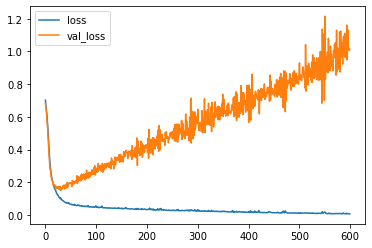

In [35]:
losses.plot()

In [41]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6730 - val_loss: 0.6652
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6421 - val_loss: 0.6176
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6057 - val_loss: 0.5880
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5676 - val_loss: 0.5528
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5344 - val_loss: 0.5079
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4916 - val_loss: 0.4612
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4444 - val_loss: 0.4122
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3903 - val_loss: 0.3684
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3634 - val_loss: 0.3260
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3401 - val_loss: 0.2953
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3031 - val_loss: 0.2651
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0

<AxesSubplot:>

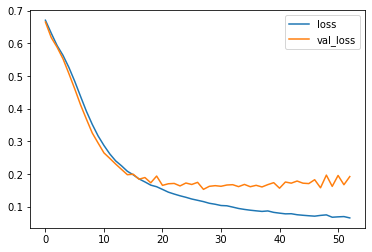

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [45]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7332 - val_loss: 0.7039
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7058 - val_loss: 0.6783
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7037 - val_loss: 0.6500
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6573 - val_loss: 0.6270
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6439 - val_loss: 0.6054
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6269 - val_loss: 0.5814
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6099 - val_loss: 0.5482
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5808 - val_loss: 0.5067
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5372 - val_loss: 0.4681
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5240 - val_loss: 0.4380
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4902 - val_loss: 0.4104
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1531 - val_loss: 0.2206
Epoch 69: early stopping


Text(0.5, 1.0, 'Model Comparison')

<Figure size 864x576 with 0 Axes>

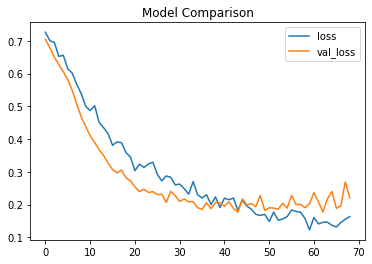

In [48]:
model_loss = pd.DataFrame(model.history.history)

plt.figure(figsize=(12,8))
model_loss.plot()
plt.title("Model Comparison")

In [62]:
predictions = (model.predict(X_test) > 0.5).astype("int32")




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        55
           1       0.99      0.83      0.90        88

    accuracy                           0.89       143
   macro avg       0.88      0.91      0.89       143
weighted avg       0.91      0.89      0.89       143



In [65]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [15 73]]
